In [3]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
# 도미와 빙어 길이 데이터 합치기
length = bream_length+smelt_length
# 도미와 빙어 무게 데이터 합치기
weight = bream_weight+smelt_weight

In [10]:
# 길이와 무게 데이터를 2차원 리스트로 만들기
fish_data = [[l,w] for l,w in zip(length,weight)]
# 정답 데이터 만들기
fish_target = [1]*35+[0]*14

In [11]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [12]:
#사이킷런으로 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    input_arr,target_arr,stratify=target_arr,random_state=42
)

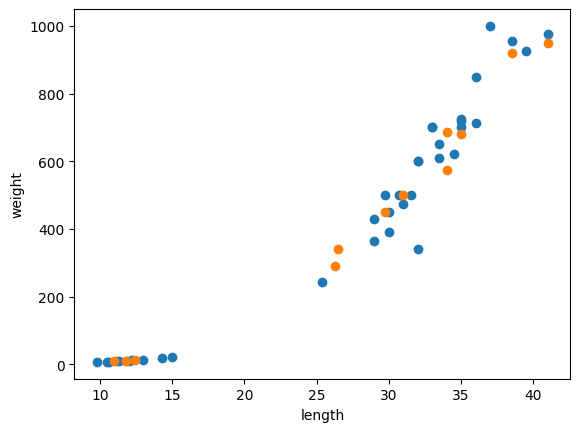

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [18]:
kn.predict([[25,150]])

array([0])

In [25]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

#print(mean, std)

train_scaled = (train_input - mean) / std # (입력값 - 평균 ) / 표준편차
test_scaled = ((test_input-mean)/std)

new = ([25,150]- mean)/std

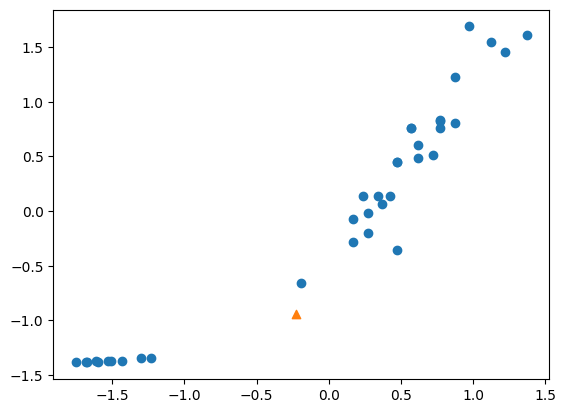

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0],train_scaled[:,1])

plt.scatter(new[0],new[1],marker='^')
plt.show()

In [28]:
kn.fit(train_scaled,train_target)
kn.score(test_scaled,test_target)

1.0

In [30]:
print(kn.predict([new]))

[1]


In [31]:
distance, indexes = kn.kneighbors([new])

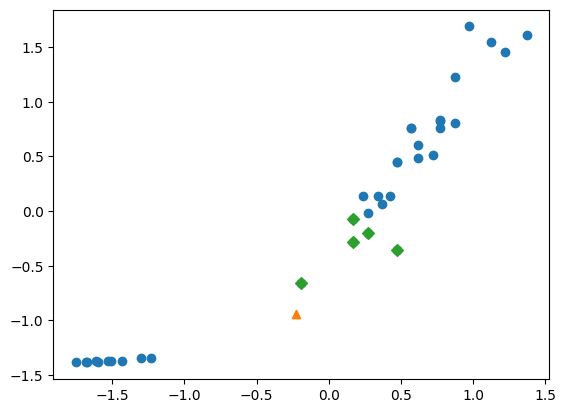

In [34]:
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0],train_scaled[:,1])

plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.show()

### page107